# fruits를 KNN으로 분류하기


In [109]:
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


# Feature Set과 Target Set을 Numpy의 Array로 변경

In [110]:
# 연습 : numpy의 column stack 과 row stack
import numpy as np
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [111]:
# 2개의 array를 묶어서 컬럼기반으로 하나의 array로 만들기
combineA = [[i,j] for i,j in zip(testA,testB)]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [112]:
# 다른 방법 
combineB = np.column_stack((testA, testB))
print(combineB)

combineB = np.row_stack((testA, testB))
print(combineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
[[ 1  2  3  4]
 [10 20 30 40]]


In [113]:
fruits_data = np.column_stack((fruits['length'],fruits['weight']))
fruits_target = np.array(fruits['name'])

In [114]:
# sklearn으로 train test 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [115]:
train_input, test_input, train_target, test_target = train_test_split(fruits_data,fruits_target, random_state= 42)

In [116]:
# knn으로 학습
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [117]:
# 정확도 출력
kn.score(test_input,test_target)

1.0

---
# 수상한 과일?

In [118]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

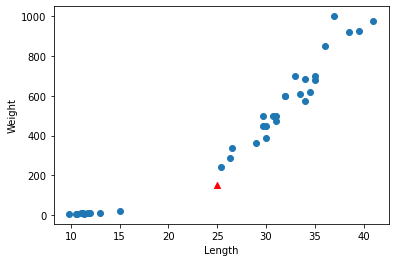

In [119]:
import matplotlib.pyplot as plt
plt.scatter( train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> apple 일 확률이 더 크지만 결과는 berry로 도출됨

In [120]:
# 이웃 확인
distance, indexes = kn.kneighbors([[25,150]])
print(indexes)

[[12 29  5 19  4]]


In [121]:
# 이웃의 index에 해당하는 Feature를 출력
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 13. ,  12.2],
        [ 26.3, 290. ],
        [ 11.8,  10. ]]])

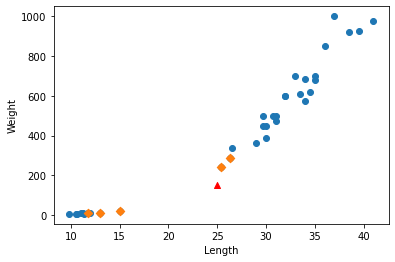

In [122]:
plt.scatter( train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

--- 
# 기준을 맞추자

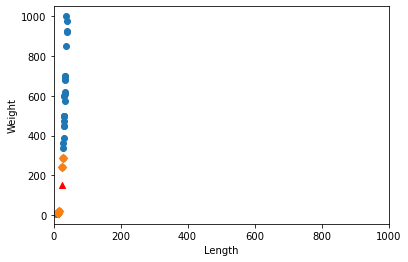

In [123]:
plt.scatter( train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

plt.xlim(0,1000)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> sample이 Length에는 거의 영향을 받지않고 Weight에서 영향을 많이 받는다.    
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞다.

In [124]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)

In [125]:
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


> Length와 Weight의 차이가 너무 심하다    
> 표준화 해줘야함!!!!

---
# train_data를 표준점수(Z점수)로 변경하자
표준점수 = (Feature - 평균)/표준편차

In [126]:
# 첫번째 방법
train_scaled = (train_input - mean) / std
train_scaled[0:5]

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357]])

In [127]:
# 두번째 방법
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit (train_input)
train_scaled2 = scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357]])

# 전처리 데이터로 모델 훈력하기

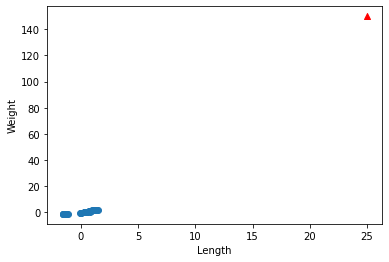

In [128]:
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [129]:
# 예측할 데이터로 표준점수로 변경이 필요
new = ([25,150] - mean)/std
new

array([-0.11507497, -0.83340638])

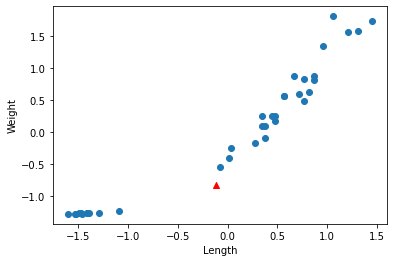

In [130]:
plt.scatter(train_scaled2[:,0],train_scaled2[:,1])
plt.scatter(new[0],new[1],marker='^',c='red')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

# KNN으로 분류

In [131]:
kn.fit(train_scaled2,train_target)

KNeighborsClassifier()

# * * * !평균과 표준편차는 Train Set에서 구한 값으로 사용함! * * *

In [133]:
# 검증 데이터도 표준점수로 변경 
test_scaled = (test_input - mean/std)

In [134]:
# 정확도 확인
kn.score(test_scaled,test_target)

0.7692307692307693

In [135]:
print(kn.predict([new]))

['apple']


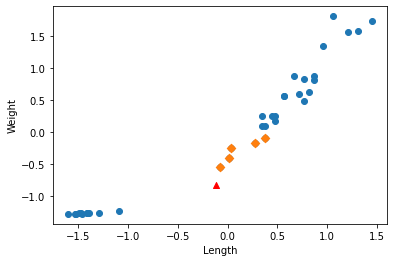

In [136]:
# 이웃 확인
distance, indexes = kn.kneighbors([new])

plt.scatter( train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0],new[1],marker='^',c='red')
plt.scatter(train_scaled2[indexes,0],train_scaled2[indexes,1],marker='D')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()